In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# scikit-learn imports
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
matplotlib.rc("text", usetex=True)
matplotlib.rc("font", family="serif")
matplotlib.style.use("dark_background")

In [3]:
cancer = load_breast_cancer()
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
print(df.shape)

(569, 30)


In [5]:
# extract values
X = df.values
print(np.average(X, axis=0))

# pre-process
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
print(np.average(X_scaled, axis=0))

[1.41272917e+01 1.92896485e+01 9.19690334e+01 6.54889104e+02
 9.63602812e-02 1.04340984e-01 8.87993158e-02 4.89191459e-02
 1.81161863e-01 6.27976098e-02 4.05172056e-01 1.21685343e+00
 2.86605923e+00 4.03370791e+01 7.04097891e-03 2.54781388e-02
 3.18937163e-02 1.17961371e-02 2.05422988e-02 3.79490387e-03
 1.62691898e+01 2.56772232e+01 1.07261213e+02 8.80583128e+02
 1.32368594e-01 2.54265044e-01 2.72188483e-01 1.14606223e-01
 2.90075571e-01 8.39458172e-02]
[-3.16286735e-15 -6.53060890e-15 -7.07889127e-16 -8.79983452e-16
  6.13217737e-15 -1.12036918e-15 -4.42138027e-16  9.73249991e-16
 -1.97167024e-15 -1.45363120e-15 -9.07641468e-16 -8.85349205e-16
  1.77367396e-15 -8.29155139e-16 -7.54180940e-16 -3.92187747e-16
  7.91789988e-16 -2.73946068e-16 -3.10823423e-16 -3.36676596e-16
 -2.33322442e-15  1.76367415e-15 -1.19802625e-15  5.04966114e-16
 -5.21317026e-15 -2.17478837e-15  6.85645643e-16 -1.41265636e-16
 -2.28956670e-15  2.57517109e-15]


In [6]:
# compute PCA transform for our data
pca = PCA()
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

In [7]:
pca.explained_variance_ratio_

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

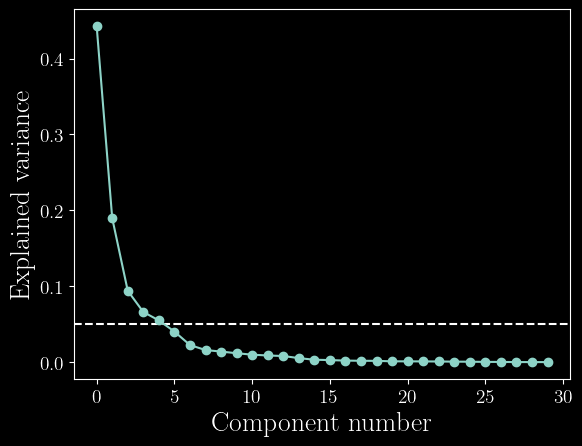

In [8]:
fig = plt.figure()
ax = plt.gca()
ax.axhline(y=0.05, color="w", linestyle="--")
ax.plot(pca.explained_variance_ratio_, marker="o")
ax.set_xlabel("Component number", fontsize=20)
ax.set_ylabel("Explained variance", fontsize=20)
ax.tick_params(axis="both", labelsize=14)

fig.savefig("pca.pdf", bbox_inches="tight", transparent=True)

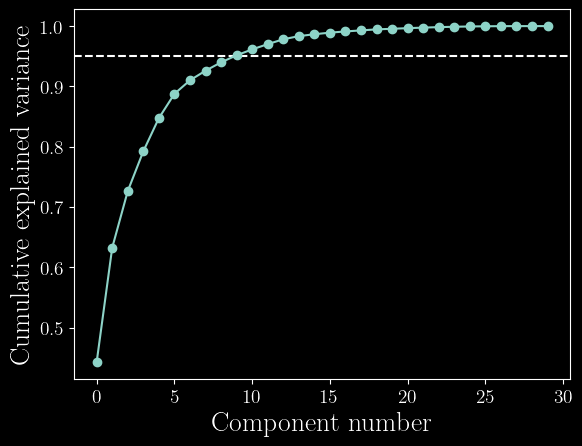

In [9]:
fig = plt.figure()
ax = plt.gca()
ax.axhline(y=0.95, color="w", linestyle="--")
ax.plot(np.cumsum(pca.explained_variance_ratio_), marker="o")
ax.set_xlabel("Component number", fontsize=20)
ax.set_ylabel("Cumulative explained variance", fontsize=20)
ax.tick_params(axis="both", labelsize=14)

fig.savefig("pca_cum.pdf", bbox_inches="tight", transparent=True)

In [12]:
print(X_scaled.shape)

(569, 30)


In [10]:
# now do PCA again, with only 2 components
pca_2 = PCA(n_components=2)
pca_2.fit(X_scaled)
X_pca_2 = pca_2.transform(X_scaled)

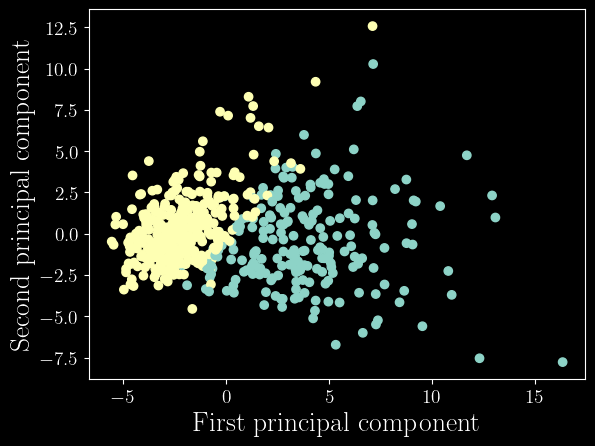

In [11]:
# now plot!
fig = plt.figure()
ax = plt.gca()
colors = np.asarray(["C0", "C1"])
scatter = ax.scatter(X_pca_2[:, 0], y=X_pca_2[:, 1], c=colors[cancer.target])
ax.set_xlabel("First principal component", fontsize=20)
ax.set_ylabel("Second principal component", fontsize=20)
ax.tick_params(axis="both", labelsize=14)

fig.savefig("pca_2d.pdf", bbox_inches="tight", transparent=True)